In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [38]:
df = pd.read_csv('diabetes_dataset.csv')

In [39]:
pd.read_csv('diabetes_dataset.csv')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
df.shape

(768, 9)

In [42]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [43]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [46]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
# Replace 0s with NaN in specific columns
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

print("Missing values after replacing 0s:")
print(df.isnull().sum())

# Fill missing values with median
for col in cols_to_replace:
    df[col].fillna(df[col].median(), inplace=True)
    
# Verify again
print("\n Missing values after imputation:")
print(df.isnull().sum())

Missing values after replacing 0s:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

 Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Verify Data Consistency & Save Cleaned Dataset

In [48]:
#  Verify data types
print("Data types of each column:")
print(df.dtypes)

#  Check for duplicates (optional)
duplicates = df.duplicated().sum()
print(f"\n Total duplicate rows: {duplicates}")

# Remove duplicates if any
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")
else:
    print("No duplicates found.")

#Final shape of cleaned dataset
print(f"\nFinal dataset shape: {df.shape}")

# Save cleaned dataset
df.to_csv("Cleaned_Diabetes_Data.csv", index=False)
print("\n Cleaned dataset saved as 'Cleaned_Diabetes_Data.csv'")


Data types of each column:
Pregnancies                   int64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

 Total duplicate rows: 0
No duplicates found.

Final dataset shape: (768, 9)

 Cleaned dataset saved as 'Cleaned_Diabetes_Data.csv'


EXPLORATORY DATA ANALYSIS (EDA)

In [49]:
# Set a clean style
sns.set(style="whitegrid")

#  Display basic info again
print(" Dataset shape:", df.shape)
print("\n First 5 rows:")
display(df.head())

print("\n Summary statistics:")
display(df.describe())


 Dataset shape: (768, 9)

 First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1



 Summary statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



 Outcome value counts:
Outcome
0    500
1    268
Name: count, dtype: int64


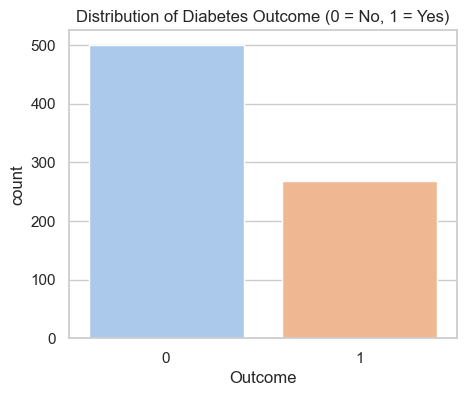

In [50]:
#  Check class balance
print("\n Outcome value counts:")
print(df['Outcome'].value_counts())

# Visualize class distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Outcome', data=df, palette='pastel')
plt.title("Distribution of Diabetes Outcome (0 = No, 1 = Yes)")
plt.show()


Visualize Feature Distributions

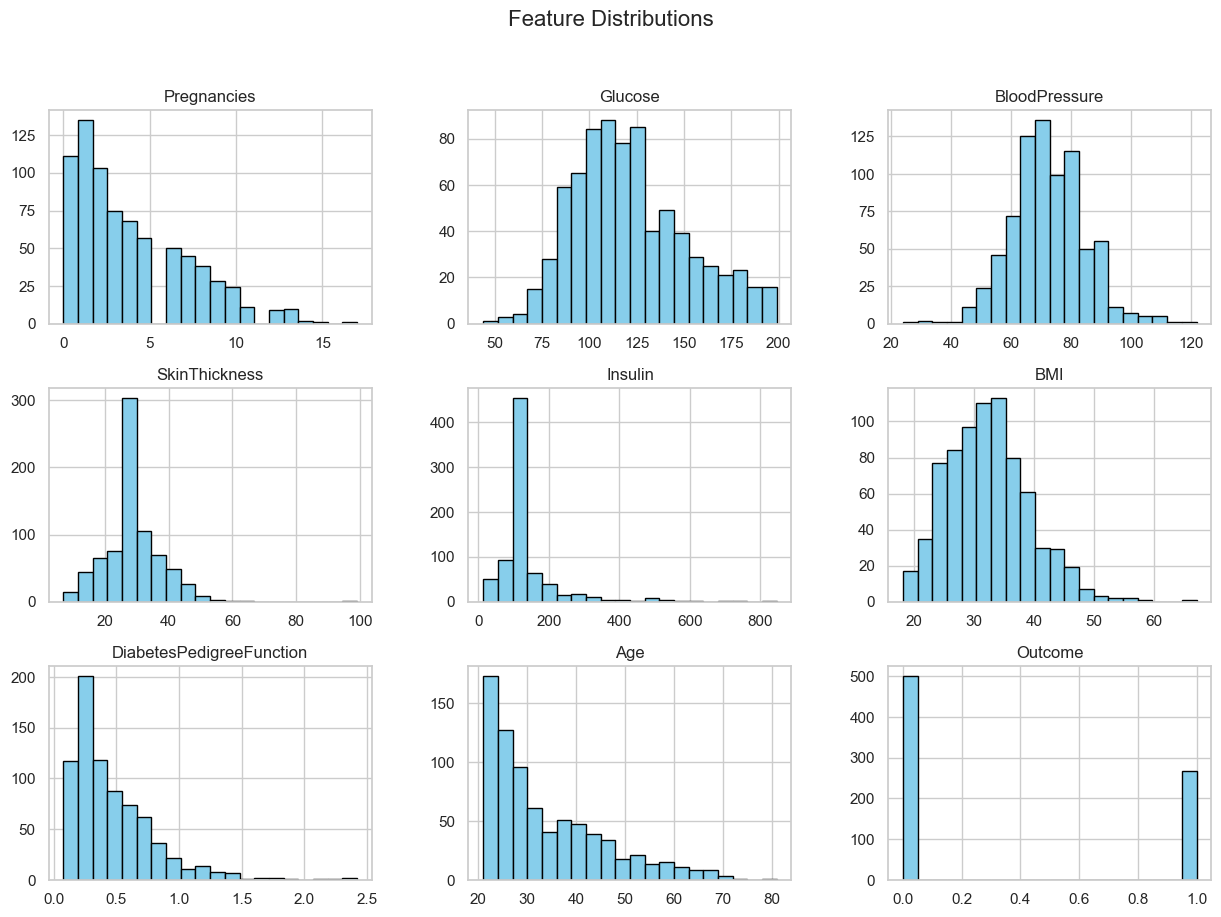

In [51]:
# Plot histograms for all numeric features
df.hist(bins=20, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

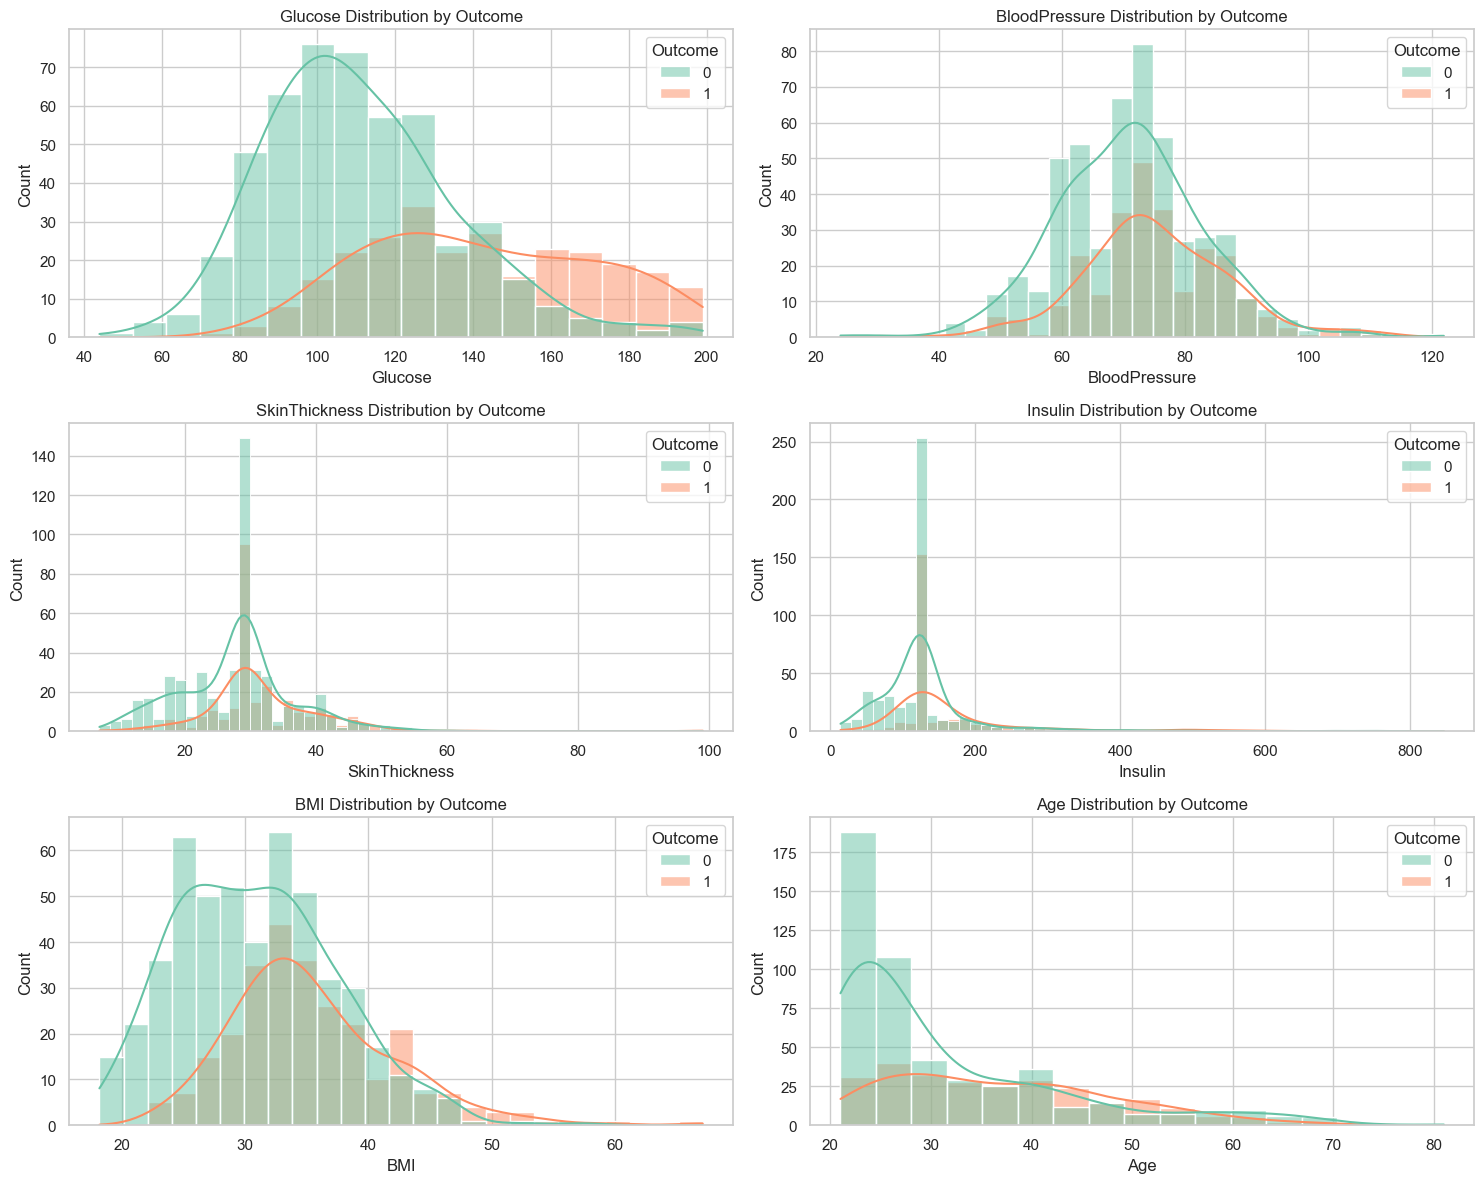

In [52]:
# Distribution plots for each key feature
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']

plt.figure(figsize=(15, 12))
for i, col in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df, x=col, hue='Outcome', kde=True, palette='Set2')
    plt.title(f"{col} Distribution by Outcome")
plt.tight_layout()
plt.show()

Correlation Matrix & Heatmap

 Correlation Matrix:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


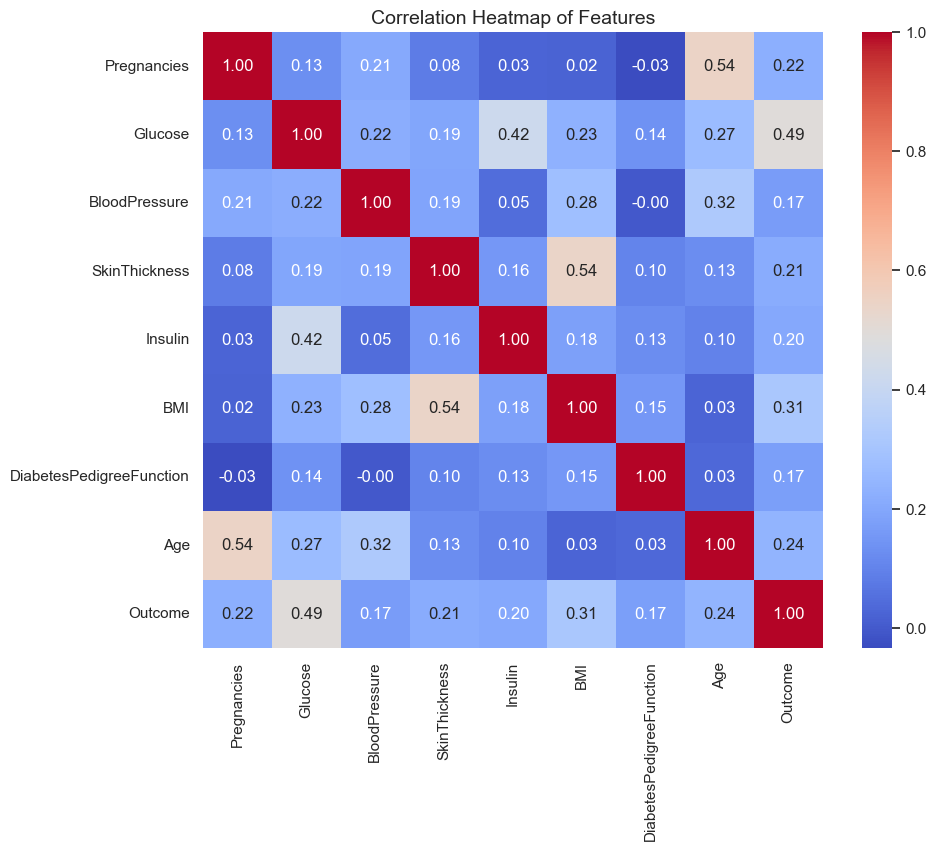

In [53]:
# Compute correlation matrix
corr_matrix = df.corr()

# Display correlation matrix
print(" Correlation Matrix:")
display(corr_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features", fontsize=14)
plt.show()


Outlier Detection with Boxplots

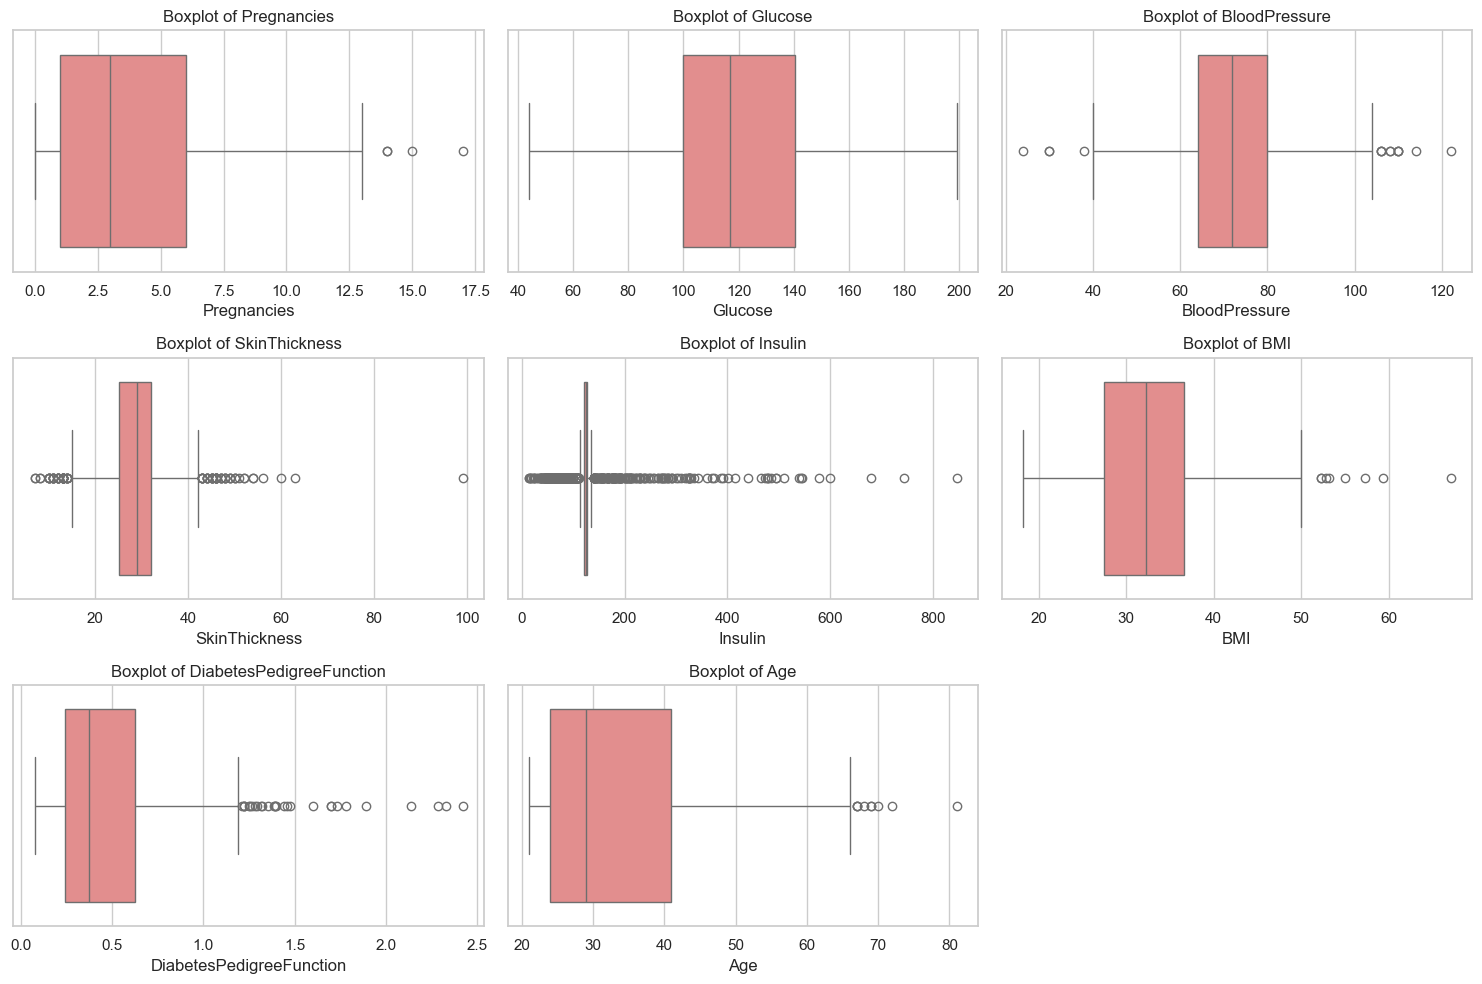

In [54]:
# List of features to check
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


Pairplot & Insights Summary

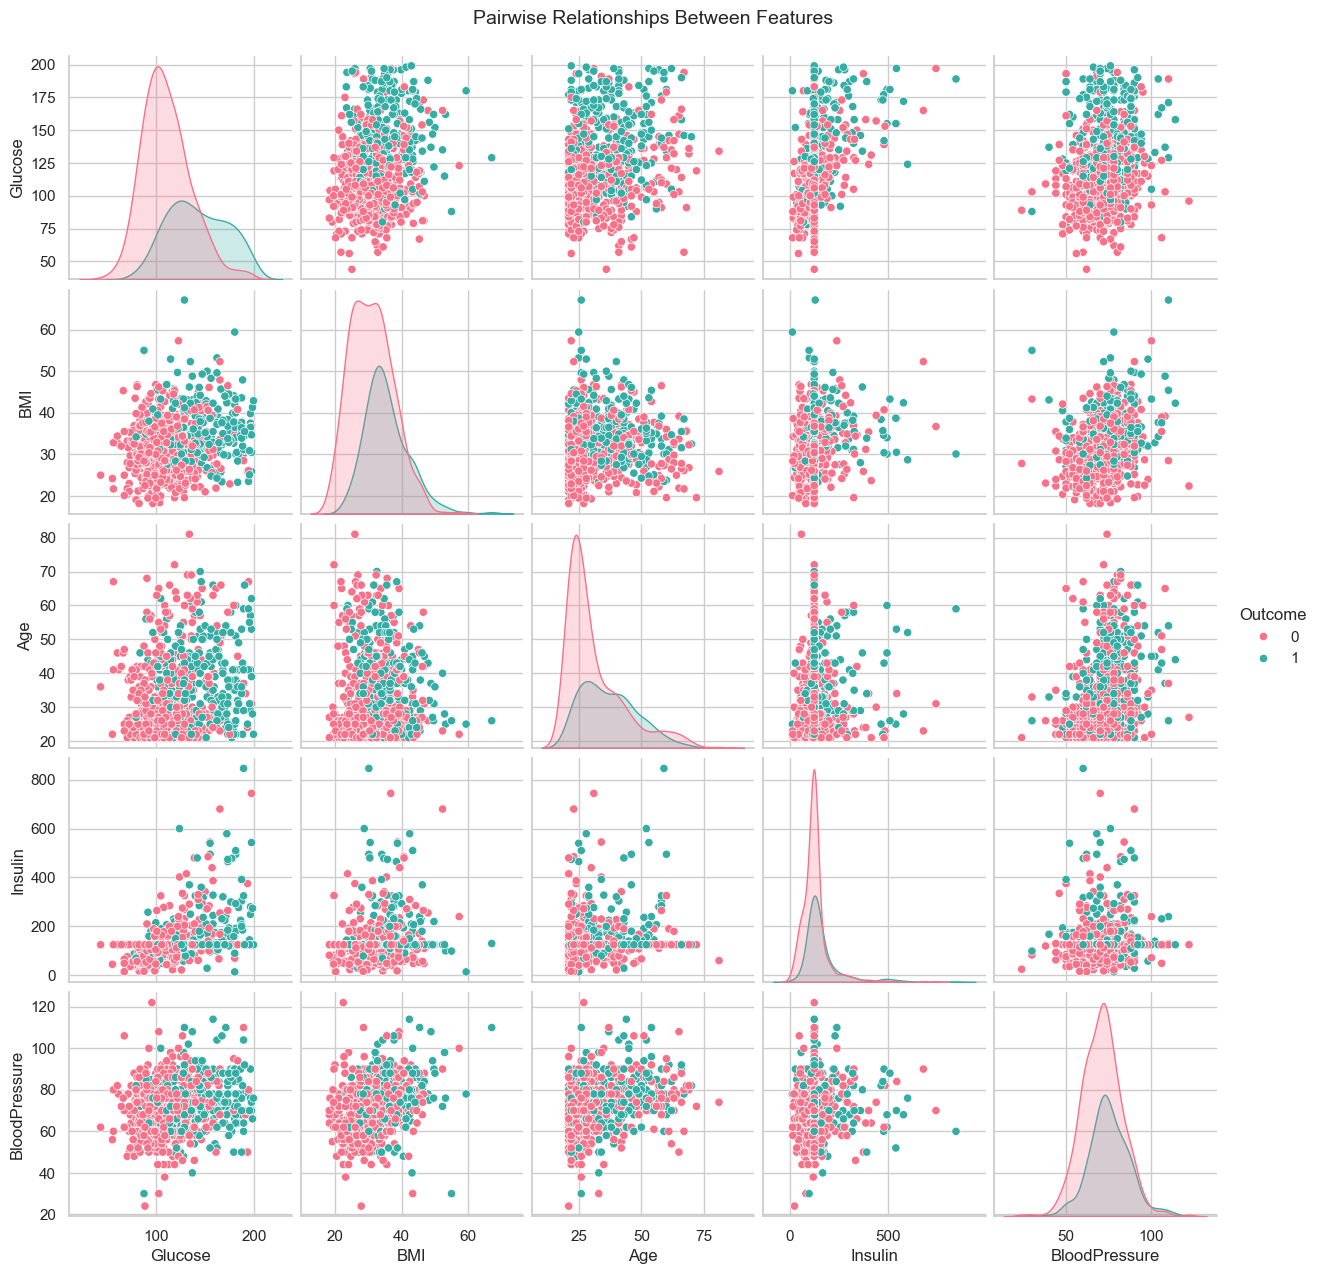

In [55]:
# Pairplot of selected important features
selected_features = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure', 'Outcome']

sns.pairplot(df[selected_features], hue='Outcome', palette='husl', diag_kind='kde')
plt.suptitle("Pairwise Relationships Between Features", y=1.02, fontsize=14)
plt.show()

 Model Building

In [56]:
# Split dataset into features and target
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (614, 8)
Test set shape: (154, 8)


Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

#  Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Feature scaling completed!")


 Feature scaling completed!


Train Multiple Models & Compare Their Accuracy

In [58]:
# Logistic Regression Model
#  Import and train Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train)

#  Make predictions
y_pred_lr = log_reg.predict(X_test_scaled)

#  Evaluate performance
print(" Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


 Logistic Regression Results:
Accuracy: 0.7077922077922078

Confusion Matrix:
 [[82 18]
 [27 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



Train & Compare Multiple Models

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [60]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

In [61]:
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Logistic Regression Accuracy: 0.7013
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

--------------------------------------------------
Decision Tree Accuracy: 0.6818
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       100
           1       0.55      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154

--------------------------------------------------
Random Forest Accuracy: 0.7792
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59   

In [62]:
# Compare results
print("\n Model Comparison:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")



 Model Comparison:
Logistic Regression: 0.7013
Decision Tree: 0.6818
Random Forest: 0.7792
KNN: 0.6753


In [63]:
import joblib

# Find the best model
best_model_name = max(results, key=results.get)
best_accuracy = results[best_model_name]

print(f"🏆 Best Model: {best_model_name}")
print(f"✅ Accuracy: {best_accuracy:.4f}")

# Retrain the best model on the full dataset
best_model = models[best_model_name]
best_model.fit(X, y)

# Save the trained model
joblib.dump(best_model, f"Best_Model_{best_model_name.replace(' ', '_')}.pkl")

print(f"💾 Model saved successfully as 'Best_Model_{best_model_name.replace(' ', '_')}.pkl'")


🏆 Best Model: Random Forest
✅ Accuracy: 0.7792
💾 Model saved successfully as 'Best_Model_Random_Forest.pkl'


Model Evaluation & Visualization

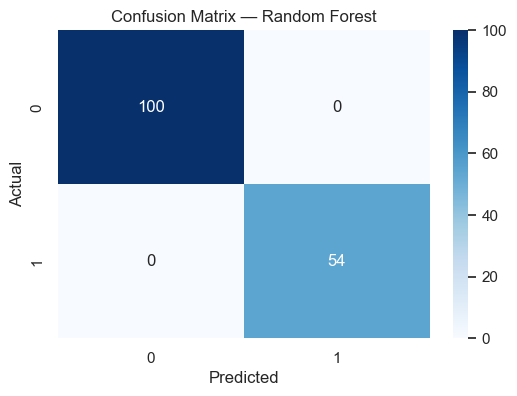

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Get predictions from best model
y_pred = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix — {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

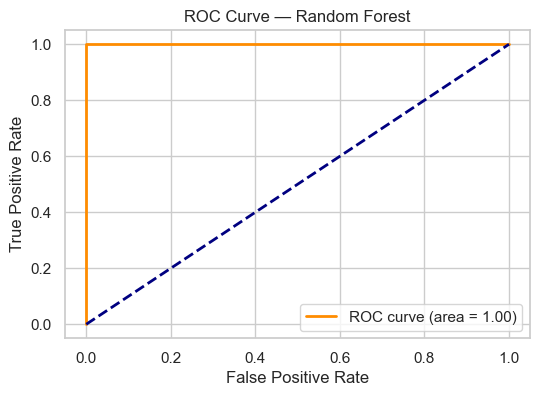

In [65]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve — {best_model_name}')
plt.legend(loc="lower right")
plt.show()


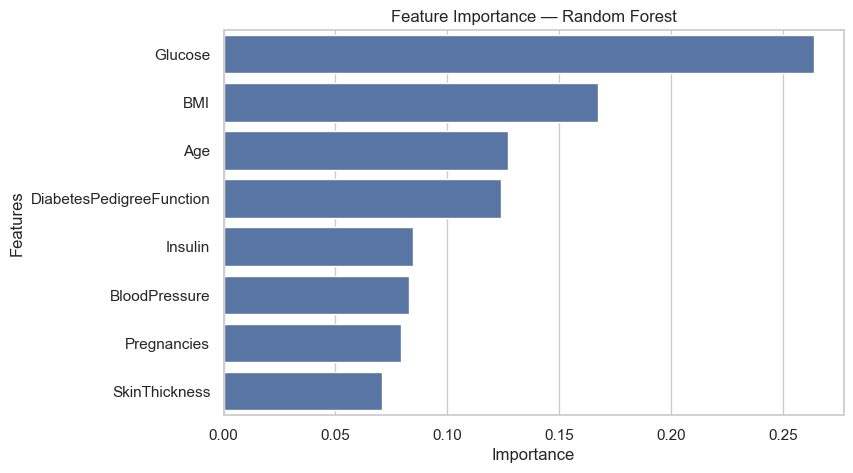

In [66]:
if hasattr(best_model, 'feature_importances_'):
    importance = best_model.feature_importances_
    features = X.columns
    sorted_idx = np.argsort(importance)[::-1]

    plt.figure(figsize=(8,5))
    sns.barplot(x=importance[sorted_idx], y=features[sorted_idx])
    plt.title(f'Feature Importance — {best_model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()


In [68]:
df.to_csv("cleaned_diabetes_data.csv", index=False)
print("✅ Cleaned dataset saved as 'cleaned_diabetes_data.csv'")

✅ Cleaned dataset saved as 'cleaned_diabetes_data.csv'


In [ ]:
import joblib

joblib.dump(best_model, f"{best_model_name}_model.pkl")
print(f"✅ Model saved as '{best_model_name}_model.pkl'")


✅ Model saved as 'Random Forest_model.pkl'


import joblib
import pandas as pd

# Load the model
model = joblib.load("RandomForest_model.pkl")  # or your model name

# Load new data
new_data = pd.read_csv("new_patient_data.csv")  # example
predictions = model.predict(new_data)

print(predictions)
